# NOAA GLERL Webcam Alignment  
This notebook is stored on my laptop in /njc/src/SSF  
It contains code used to learn how to align images from **View \#1 of NOAA GLERL Michigan City Webcam**

## Loading an image using matplotlib 
Using the matplotlib python library to load an image into a jupyter notebook.

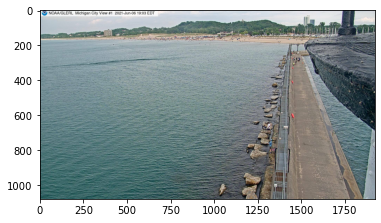

In [1]:
import matplotlib.pyplot as plt                      # import matplotlib 
img1 = plt.imread('MC20210606_2303_01_1903edt.jpg')  # define variable for image
plt.imshow(img1)                                     # display image

## Loading and converting the image into grayscale using PIL and matplot lib
Working with grayscale images can make it easier to align them.

<class 'PIL.JpegImagePlugin.JpegImageFile'>
2
<class 'PIL.Image.Image'>


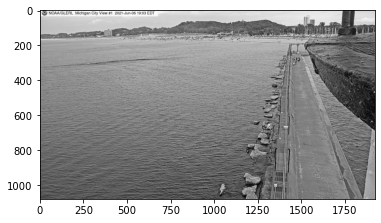

In [14]:
import matplotlib.pyplot as plt                       # import matplotlib 
from PIL import Image                                 # import tools from PIl
img = Image.open("MC20210606_2303_01_1903edt.jpg")    # open the color image
print(type(img))
gray = img.convert('L')                               # convert image to black and white
print (len(np.shape(gray)))                           # Check if the array is 2D          
print(type(gray))
#gray.show()                                           # display image in viewer using PIL
plt.imshow(gray,cmap='gray')                          # display image in notebook and force matplotlib to show in grayscale

## Loading and converting the image into grayscale using only matplotlib

(1080, 1920, 3)


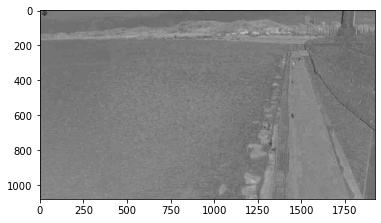

In [26]:
import matplotlib.pyplot as plt                       # import matplotlib 
import numpy as np                                    # importing NumPy

img1 = plt.imread('MC20210606_2303_01_1903edt.jpg')   # define variable for image
print (np.shape(img1))
gray2 = np.mean(img1, -1) # Getting the arithmatic average of the image along the last axis 
#plt.subplot(311)
#plt.imshow(img1[:,:,0], cmap = 'gray')
#plt.subplot(312)
#plt.imshow(img1[:,:,1], cmap = 'gray')
#plt.subplot(313)
#plt.imshow(img1[:,:,2], cmap = 'gray')
plt.imshow(gray-gray2, cmap = 'gray')     # displaying the image using a gray colormap

using wgt


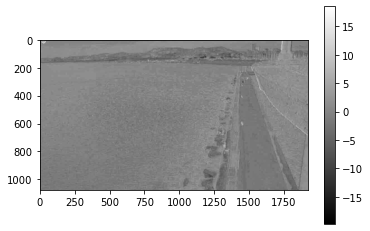

In [27]:
def rgb2gray (a, method = "avg"):                   
    s = np.shape(a)
    bw = np.zeros((s[0],s[1]))
    if method == "avg":
        w = np.array((1,1,1))/3.
        print ('using avg')
    elif method == "wgt":
        w = np.array((0.299,0.587,0.114))
        print('using wgt')
    else: 
        w = np.array((1,1,1))/3.  
        print ("defaulting to wgt")
    bw = a[:,:,0]*w[0]+a[:,:,1]*w[1]+a[:,:,2]*w[2]
    return bw

bw = rgb2gray(img1,"wgt")
plt.imshow(gray2-bw, cmap = 'gray')
plt.colorbar()

## Alignment Quiz (Answer reveal on Monday 06/14/2021!)
### Goals:  
* Write a function that will return an error metric so I can assess the differenes between the two images before and after I try to align them.
* Align two imagaes to a base reference image (one image is a shifted version of the refernece, the other is a different picture of the same view but from a different time)
    * Manually translate the images to align them until error metric is negligible. 
    * Write code that will automate the manual process using cross-correlation.   

Here is a link to a stack overflow page that had a lot of really useful examples for how to [compare two images](https://stackoverflow.com/questions/189943/how-can-i-quantify-difference-between-two-images)  
This stack overflow page is also helpful in doing manual image translation with a [translation matrix](https://stackoverflow.com/questions/54274185/shifting-an-image-by-x-pixels-to-left-while-maintaining-the-original-shape/54274222)

### Practice Code

In [ ]:
i1 = plt.imread("MC20210606_2233_01_1833edt.jpg")
i2 = plt.imread("MC20210606_2303_01_1903edt.jpg")

bw1= rgb2gray(i1, "wgt")
bw2= rgb2gray(i2, "wgt")
diff = bw1-bw2
plt.imshow(diff)
plt.colorbar()

In [ ]:
from PIL import Image
from PIL import ImageChops

im1 = Image.open("MC20210606_2233_01_1833edt.jpg")
im2 = Image.open("MC20210606_2303_01_1903edt.jpg")

diff = ImageChops.difference(im2, im1)
diff.getbbox()
print (im1.size)

(2160, 2160)
[[ 1.          0.96151167  0.93604927 ... -0.18334511 -0.18863754
  -0.2150356 ]
 [ 0.96151167  1.          0.97769121 ... -0.16634332 -0.1742732
  -0.20062859]
 [ 0.93604927  0.97769121  1.         ... -0.15535515 -0.16346963
  -0.18761085]
 ...
 [-0.18334511 -0.16634332 -0.15535515 ...  1.          0.96015682
   0.90127761]
 [-0.18863754 -0.1742732  -0.16346963 ...  0.96015682  1.
   0.95991372]
 [-0.2150356  -0.20062859 -0.18761085 ...  0.90127761  0.95991372
   1.        ]]


<ipython-input-23-03ff09d31a88>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


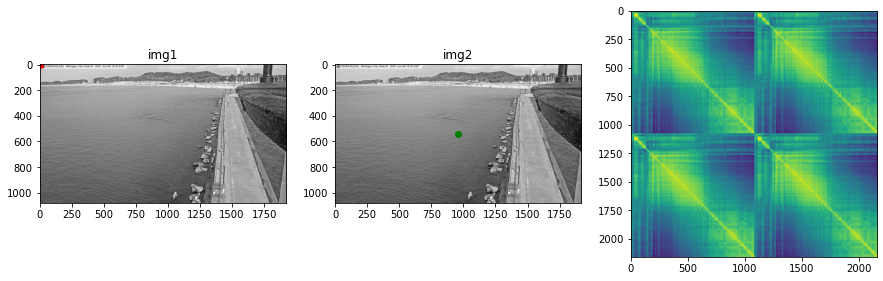

In [23]:
import numpy as np
from PIL import Image

img1 = np.asarray(Image.open("MC20210606_2233_01_1833edt.jpg").convert("L"))
img2 = np.asarray(Image.open("MC20210606_2233_01_1833edt.jpg").convert("L"))
corr1 = np.corrcoef(img1, img2)
print (corr1.shape)

# compute position of maximum correlation
y, x = np.unravel_index(np.argmax(corr1), corr1.shape)
# plot results
y2, x2 = np.array(img2.shape) // 2

fig, (ax_img1, ax_img2, ax_corr1) = plt.subplots(1, 3, figsize=(15, 5))
im = ax_img1.imshow(img1, cmap='gray')
ax_img1.set_title('img1')
ax_img2.imshow(img2, cmap='gray')
ax_img2.set_title('img2')
im = ax_corr1.imshow(corr1, cmap='viridis')
ax_corr.set_title('Cross-correlation')
ax_img1.plot(x, y, 'ro')
ax_img2.plot(x2, y2, 'go')
ax_corr.plot(x, y, 'ro')
fig.show()
print (corr1)

### Function to plot the location of best correlation between two images

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal

def plot_corr(i1,i2):
    # load images and convert to grayscale
    i1 = Image.open(i1).convert('L')
    i2 = Image.open(i2).convert('L')
    # turn the PIL images into numpy arrays
    a1 = np.array(i1)
    a2 = np.array(i2)
    # use scipy to cross correlate the arrays, return an error if arrays are not 2D this takes more RAM than my machine has
    if len(np.shape(a1)) == 2 and len(np.shape(a2)) == 2:
        corr = signal.correlate2d(a1, a2, mode = 'same') #this command will run forever.
        # ndimgae.correlate(a1, a2) returns a memory error
    else:
        print ('Must used two 2D arrays for correlation')
    # compute position of maximum correlation
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    # plot results
    x2, y2 = np.array(img2.shape) // 2

    fig, (ax_img1, ax_img2, ax_corr) = plt.subplots(1, 3, figsize=(15, 5))
    im = ax_img1.imshow(img1, cmap='gray')
    ax_img1.set_title('img1')
    ax_img2.imshow(img2, cmap='gray')
    ax_img2.set_title('img2')
    im = ax_corr.imshow(corr, cmap='viridis')
    ax_corr.set_title('Cross-correlation')
    ax_img1.plot(x, y, 'ro')
    ax_img2.plot(x2, y2, 'go')
    ax_corr.plot(x, y, 'ro')
    fig.show()

### Function that returns the norm of the elementwise difference of two arrays 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def imgarray_dif(img1, img2):
    # read images
    img1 = plt.imread(img1)
    img2 = plt.imread(img2)
    # convert images into 2D grayscale arrays
    img1 = rgb2gray(img1, "wgt") 
    img2 = rgb2gray(img2, "wgt")
    # compare the arrays
    # Manhatten Norm
    m_norm = sum( abs(img1-img2) ) / img1.size
    # Normalized Cross-Correlation [wikipedia page on formulas](https://en.wikipedia.org/wiki/Cross-correlation#Normalized_cross-correlation)
    cc_norm = sum( (img1 - np.mean(img1)) * (img2 - np.mean(img2)) ) / ((img1.size - 1) * np.std(img1) * np.std(img2) )
    # show values
    return (print(m_norm, cc_norm))

    
    
    
    

In [28]:
imgarray_dif("MC20210606_2233_01_1833edt.jpg","MC20210606_2303_01_1903edt.jpg")

using wgt
using wgt
[0.00759004 0.0071034  0.00701865 ... 0.01117422 0.00969591 0.01005465] [0.00034134 0.00034385 0.00034637 ... 0.0009272  0.00095418 0.00095846]


### Function to display images

In [29]:
import numpy as np                                               #import libraries
import matplotlib.pyplot as plt
from PIL import Image 
import matplotlib.image as mpimg
from glob import glob

def plot_album(album_name):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    # this assumes the images are in images_dir/album_name/<name>.jpg
    image_paths = glob("imgname" + '/*.jpg')
    for imp, ax in zip(image_paths, axes.ravel()):
        img = mpimg.imread(imp)
        ax.imshow(img)
        ax.axis('off')
    fig.tight_layout()
    
